#### Packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from pandas_profiling import ProfileReport
%matplotlib inline

/usr/local/lib/python3.6/site-packages/pandas_profiling/base.py:20: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/local/Cellar/python/3.6.4_4/Frameworks/Python.framework/Versions/3.6/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/local/Cellar/python/3.6.4_4/Frameworks/Python.framework/Versions/3.6/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python3.6/s

#### Variables

In [3]:
infile = '../data/titanic_train.csv'
outfile = '../data/titanic_train_clean.csv'
sex_codes = {
    'male' : 0,
    'female' : 1,
}

embarked_codes = {
    '': 0,   # Unknown
    'S': 1,  # Southampton
    'C': 2,  # Cherbourg
    'Q': 3,  # Queenstown
}

#### Code

In [4]:
def import_clean(infile, outfile, sex_codes, embarked_codes):
    '''
    Imports the training dataset and encodes the sex and 
    embarked varibles
    '''
    
    df = pd.read_csv(infile)
    df.columns = [x.lower() for x in df.columns]
    df['sex'].replace(sex_codes, inplace=True)
    df['embarked'].replace(embarked_codes, inplace=True)
    print('Total Records: ',len(df))
    df.to_csv(outfile)
    
    return df

df = import_clean(infile, outfile, sex_codes, embarked_codes)

Total Records:  891


In [28]:
# Basic Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
passengerid    891 non-null int64
survived       891 non-null int64
pclass         891 non-null int64
name           891 non-null object
sex            891 non-null int64
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
ticket         891 non-null object
fare           891 non-null float64
cabin          204 non-null object
embarked       889 non-null float64
dtypes: float64(3), int64(6), object(3)
memory usage: 83.6+ KB


In [9]:
# Correlation Matrix
df_corr = df.corr()
df_corr.round(1)

,passengerid,pclass,sex,age,sibsp,parch,fare,embarked
passengerid,1.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0
pclass,-0.0,1.0,-0.1,-0.5,0.0,0.0,-0.6,0.0
sex,-0.0,-0.1,1.0,-0.0,0.1,0.2,0.2,0.1
age,-0.0,-0.5,-0.0,1.0,-0.1,-0.1,0.3,0.1
sibsp,0.0,0.0,0.1,-0.1,1.0,0.3,0.2,-0.1
parch,0.0,0.0,0.2,-0.1,0.3,1.0,0.2,-0.1
fare,0.0,-0.6,0.2,0.3,0.2,0.2,1.0,0.1
embarked,-0.0,0.0,0.1,0.1,-0.1,-0.1,0.1,1.0


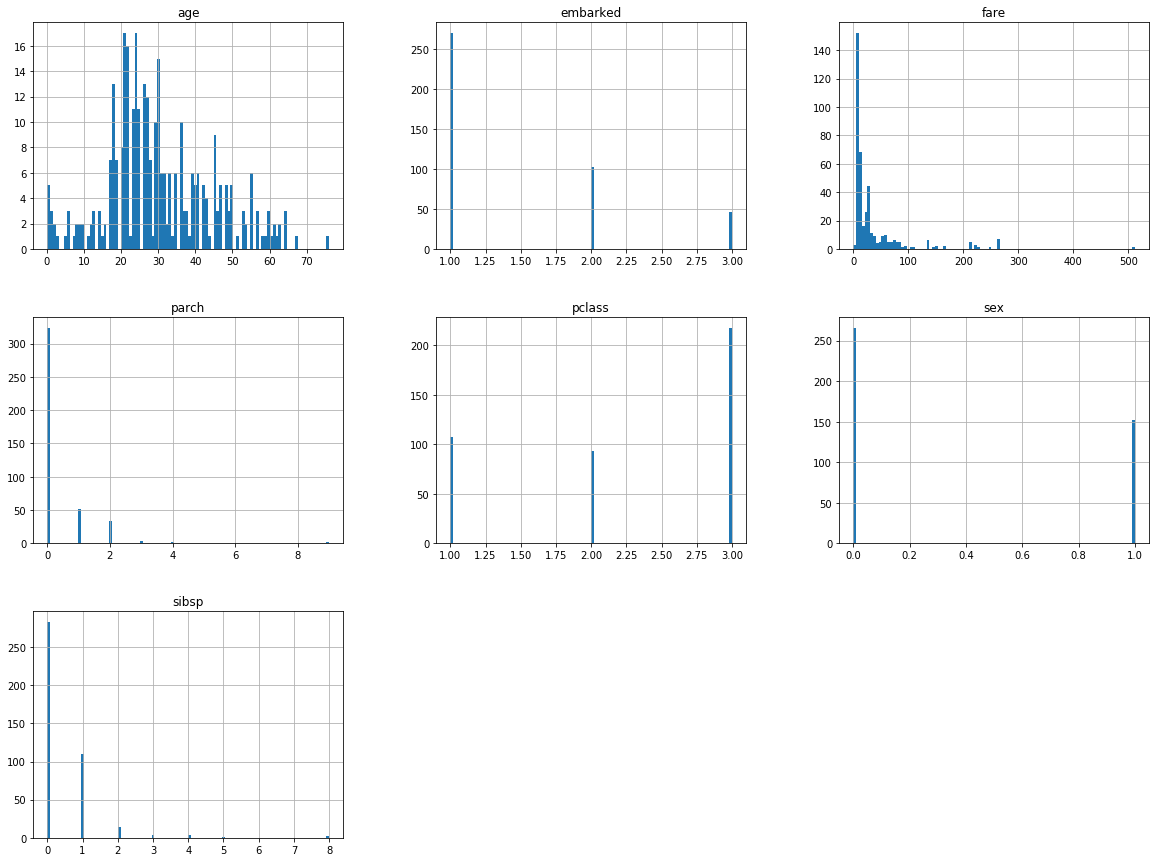

In [10]:
# Basic Plots
df.drop('passengerid', axis=1).hist(bins=100, figsize=(20,15))
plt.show()

In [11]:
# Profile Report
ProfileReport(df)

Number of variables,11
Number of observations,418
Total Missing (%),9.0%
Total size in memory,36.0 KiB
Average record size in memory,88.2 B
Numeric,8
Categorical,2
Date,0
Text (Unique),1
Rejected,0
Distinct count,80


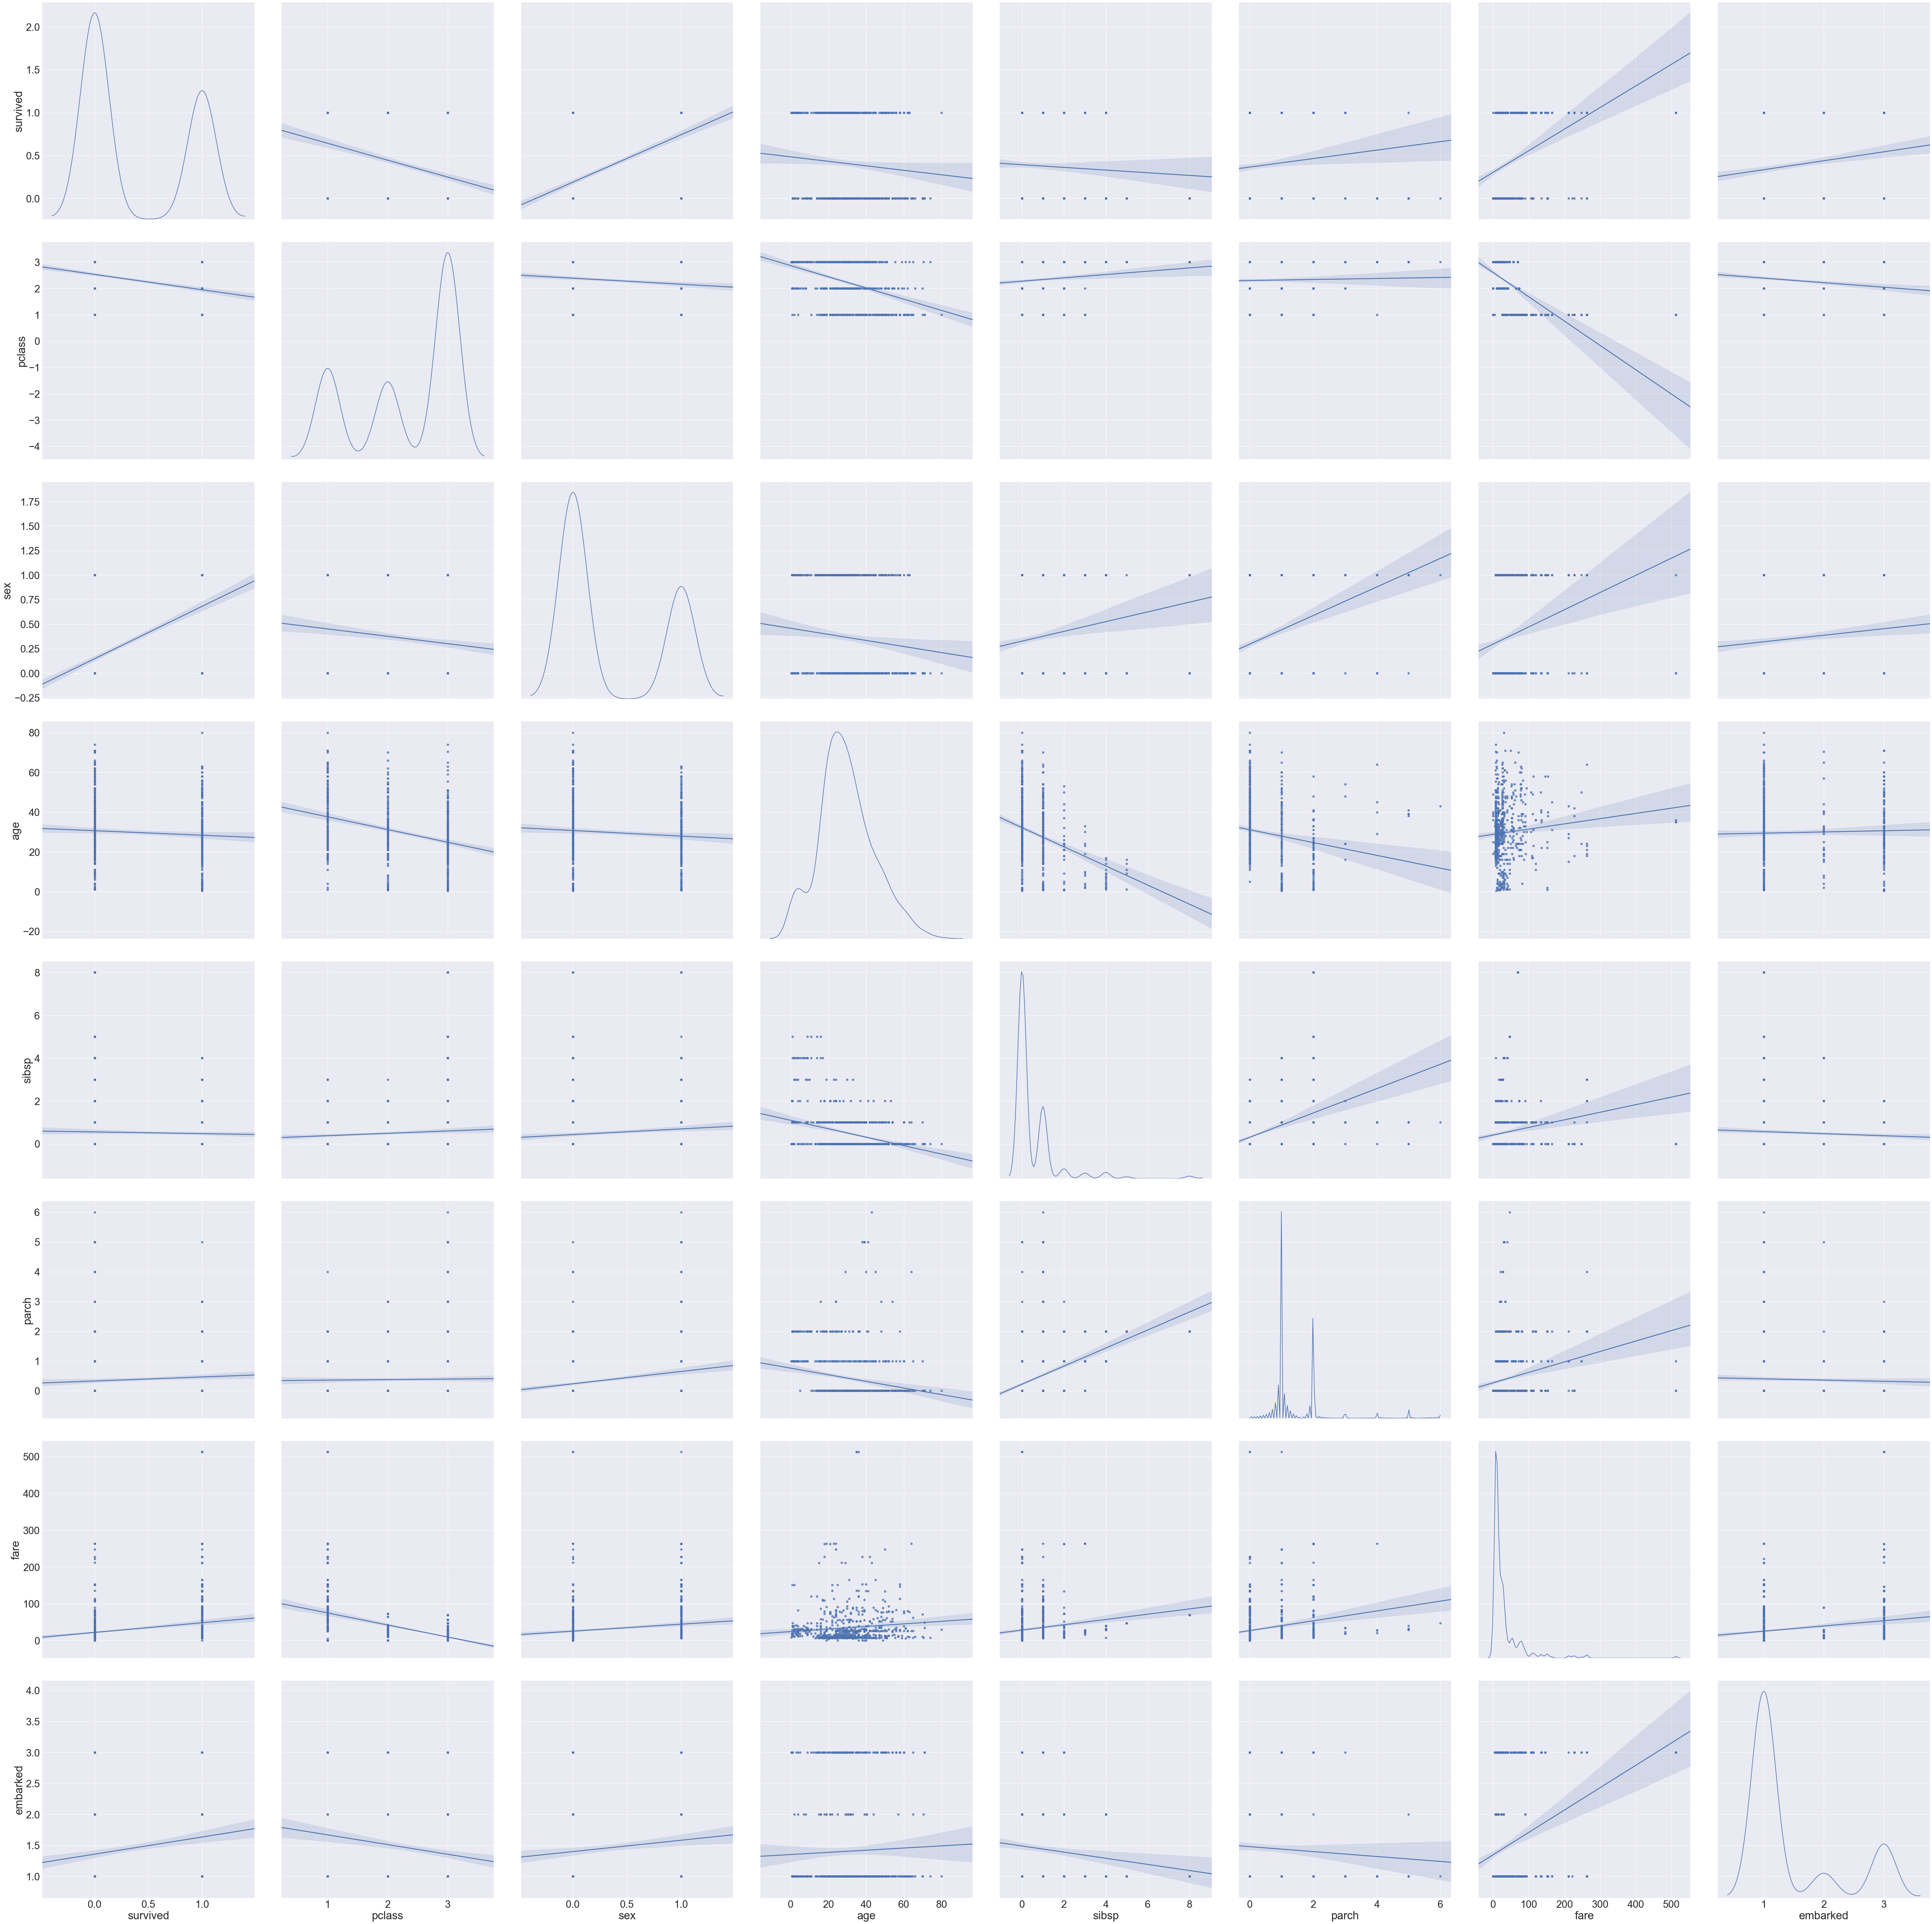

In [37]:
# Seaborn pairplot

# Making the fonts bigger
sns.set(font_scale=3)

# Running the pairplot
pairplot1 = sns.pairplot(
    data=df.drop('passengerid', axis=1), 
    diag_kind='kde',
    kind="reg",
    size=10
)

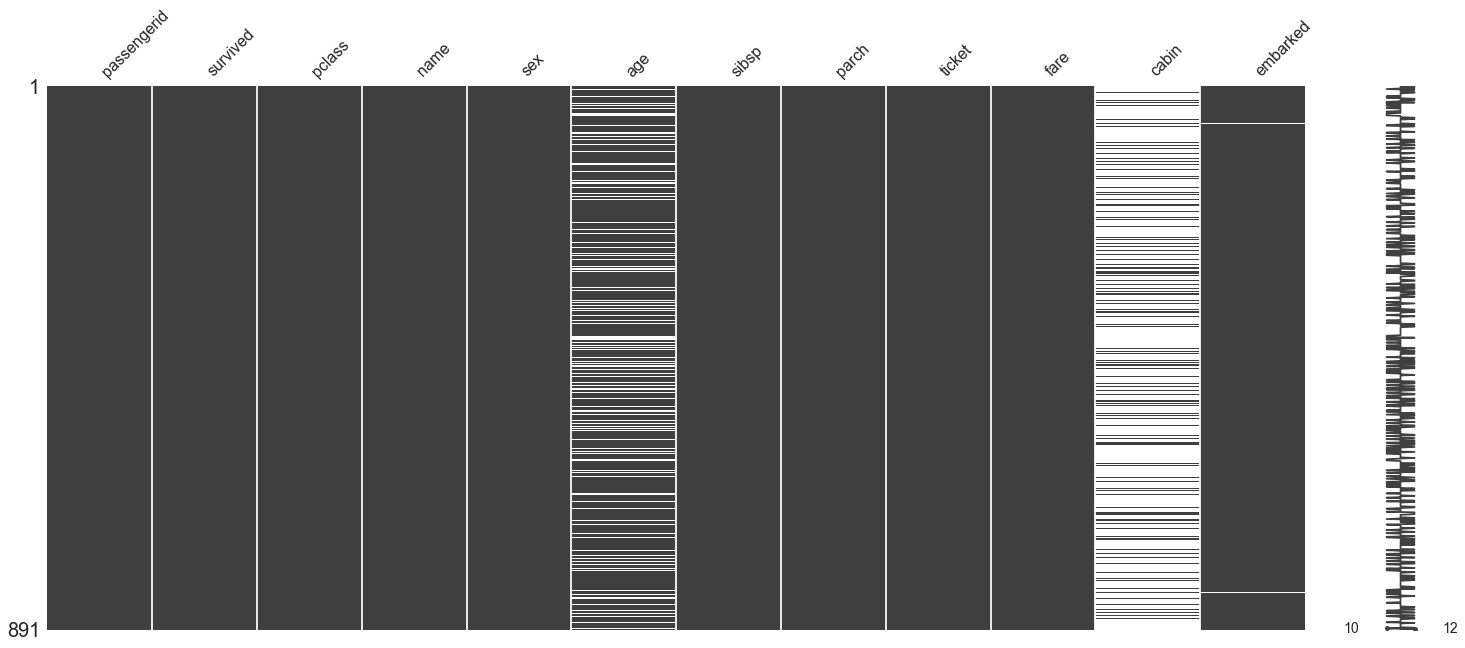

In [36]:
# Visualising missing values
missingno.matrix(df)